# Logistic Regression with a Neural Network mindset

In [82]:
import numpy as np 
import matplotlib.pyplot as plt 
import h5py 
import scipy 
from PIL import Image 
from scipy import ndimage 
from lr_utils import load_dataset

In [83]:
#请访问http://www.missshi.cn/#/books搜索train_catvnoncat.h5和test_catvnoncat.h5进行下载
# Loading the data (cat/non-cat) 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

#• m_train (number of training examples) 
#• m_test (number of test examples) 
#• num_px (= height = width of a training image)
### START CODE HERE ### (￿ 3 lines of code)
m_train = train_set_x_orig.shape[0] 
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###
print ("Number of training examples: m_train = " + 
       str(m_train)) 
print ("Number of testing examples: m_test = " + 
       str(m_test)) 
print ("Height/Width of each image: num_px = " + 
       str(num_px)) 
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape)) 
print ("train_set_y shape: " + str(train_set_y.shape)) 
print ("test_set_x shape: " + str(test_set_x_orig.shape)) 
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [84]:
# Example of a picture 
index = 25 
plt.imshow(train_set_x_orig[index]) 
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + 
       "' picture.") 

y = [1], it's a 'cat' picture.


In [85]:
#这行不执行
#X_flatten = X.reshape(-1,X.shape[0])

# Reshape the training and test examples 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
#"Standardize" the data
#像素值分范围0-255，所以此处的“标准化”是都除以255
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
#维度 
#X:(num_px * num_px * 3,number of examples)
#Y:(1, number of examples)
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape)) 
print ("train_set_y shape: " + str(train_set_y.shape)) 
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape)) 
print ("test_set_y shape: " + str(test_set_y.shape))
#下面这行代码是什么意思？
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [86]:
# GRADED FUNCTION: sigmoid 
def sigmoid(z): 
    """ 
    Compute the sigmoid of z
    Arguments: 
    z -- A scalar or numpy array of any size
    Return
    s -- sigmoid(z) 
    """
    s = 1/(1+np.exp(-z))
    return s

In [87]:
def initialize_with_zeros(dim): 
    """ 
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument: 
    dim -- size of the w vector we want (or number of parameters in this case), →
    Returns: 
    w -- initialized vector of shape (dim, 1) 
    b -- initialized scalar (corresponds to the bias) 
    为什么是(dim,1):
    z=w1*x1+w2*x2+w3*x3+......wm*xm+b
    yhat=sigmod(z)
    """
    w = np.zeros((dim,1)) 
    b = 0
    assert(w.shape == (dim, 1)) 
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [88]:
# GRADED FUNCTION: propagate 
def propagate(w, b, X, Y): 
    """ 
    Implement the cost function and its gradient for the propagation explained above, →
    Arguments: 
    w -- weights, a numpy array of size (num_px * num_px * 3, 1) 
    b -- bias, a scalar X -- data of size (num_px * num_px * 3, number of examples) 
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples), →
    Return: 
    cost -- negative log-likelihood cost for logistic regression 
    dw -- gradient of the loss with respect to w, thus same shape as w 
    db -- gradient of the loss with respect to b, thus same shape as b
    Tips: - Write your code step by step for the propagation. np.log(), np.dot(), → 
    """
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST) 
    A = sigmoid(np.dot(w.T,X)+b)
    # compute activation 
    #cost=-1/m[∑(yilogai+(1-yi)log(1-ai)]
    cost = -(np.dot(Y,np.log(A.T))+np.dot(np.log(1-A),(1-Y).T))/m 
    # compute cost, →
    # BACKWARD PROPAGATION (TO FIND GRAD)
    #单个样本：
    #da=-y/a+(1-y)/(1-a)
    #dz=a-y
    #dw=dz*x
    #db=dz
    #m个样本：
    #dZ=A-Y
    #dW=(1/m)(X*dZ.T)
    #db=(1/m)*(np.sum(dZ,axis=1,keepdims=True))
    dw = np.dot(X,(A-Y).T)/m 
    db = np.sum(A-Y)/m
    assert(dw.shape == w.shape) 
    assert(db.dtype == float) 
    cost = np.squeeze(cost) 
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    return grads, cost
#X是输入的m个样本数据及其特征组成的矩阵
#Y是m个样本的标签组成的矩阵

In [89]:
# GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False): 
    """ 
    This function optimizes w and b by running a gradient descent algorithm, 
    Arguments: 
    w -- weights, a numpy array of size (num_px * num_px * 3, 1) 
    b -- bias, a scalar 
    X -- data of shape (num_px * num_px * 3, number of examples) 
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples), 
    num_iterations -- number of iterations of the optimization loop 
    learning_rate -- learning rate of the gradient descent update rule 
    print_cost -- True to print the loss every 100 steps
    Returns: 
    params -- dictionary containing the weights w and bias b 
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function, → 
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve., →
    Tips: You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs = []
    #迭代num_iterations次，w=w-a*dw，b=b-a*db，cost = -(np.dot(Y,np.log(A.T))+np.dot(np.log(1-A),(1-Y).T))/m，与Y和A有关，
    #Y是固定量，但是每次迭代都改变A，即，A是学习变量。A = sigmoid(np.dot(w.T,X)+b)，每次迭代，都会改变w和b。
    for i in range(num_iterations):
        # Cost and gradient calculation (1-4 lines of code) 
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        # Retrieve derivatives from grads 
        dw = grads["dw"] 
        db = grads["db"]
        # update rule (2 lines of code) 
        ### START CODE HERE ###
        #w=w-a*dw
        #b=b-a*db
        w = w-learning_rate*dw 
        b = b-learning_rate*db 
        ### END CODE HERE ###
        # Record the costs 
        if i % 100 == 0: 
            costs.append(cost)
        # Print the cost every 100 training examples 
        if print_cost and i % 100 == 0: 
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w, 
              "b": b}
    grads = {"dw": dw, 
             "db": db}
    return params, grads, costs


In [90]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, 
                                learning_rate = 0.009, print_cost = False)
#print ("w = " + str(params["w"])),print ("b = " + str(params["b"]))
#print ("dw = " + str(grads["dw"])),print ("db = " + str(grads["db"]))

In [91]:
def predict(w, b, X): 
    ''' 
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    Arguments: 
    w -- weights, a numpy array of size (num_px * num_px * 3, 1) 
    b -- bias, a scalar 
    X -- data of size (num_px * num_px * 3, number of examples)
    Returns: 
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X 
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    #w的行数和X的函数相同，列数为1，如果W已经符合了，则不会有任何转变。
    w = w.reshape(X.shape[0], 1)
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (1 line of code) 
    A = sigmoid(np.dot(w.T,X)+b)
    ### END CODE HERE ###
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i] 
        ### START CODE HERE ### (4 lines of code) 
        if A[0][i]<=0.5:A[0][i]=0 
        else: A[0][i]=1 
    Y_prediction=A 
    ### END CODE HERE ###
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [92]:
# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """ 
    Builds the logistic regression model by calling the function you've implemented previously, →
    Arguments: 
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train), → 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train), → 
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test), → 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test), → 
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters, → 
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize(), → 
    print_cost -- Set to true to print the cost every 100 iterations
    Returns: 
    d -- dictionary containing information about the model. 
    """
    ### START CODE HERE ###
    # initialize parameters with zeros (1 line of code) 
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent (1 line of code) 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, 
                                        num_iterations, learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"] 
    b = parameters["b"]
    # Predict test/train set examples (2 lines of code) 
    Y_prediction_test = predict(w, b, X_test) 
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    # Print train/test Errors 
    print("train accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    #等效于：
    #print("test accuracy:{}%".format((1-np.mean(np.abs(Y_prediction_test-Y_test)))*100))
    d = {"costs": costs, 
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, "b" : b, 
         "learning_rate" : learning_rate, 
         "num_iterations": num_iterations}
    return d 

In [93]:
print(train_set_y.shape)
print(train_set_x.shape)
#X应该是(12288,209)
d = model(train_set_x, train_set_y, test_set_x, test_set_y, 
          num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(1, 209)
(12288, 209)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


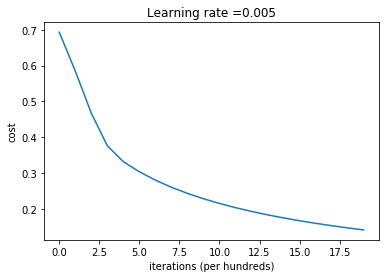

In [96]:
# Plot learning curve (with costs) 
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost') 
plt.xlabel('iterations (per hundreds)') 
plt.title("Learning rate =" + str(d["learning_rate"])) 
plt.show()